# Necessary Libraries for the project 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the load_diabetes dataset from sklearn library

In [11]:
from sklearn.datasets import load_diabetes

In [12]:
dataset = load_diabetes()

# Description of the dataset for analysis of data

In [13]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

# Extracting the input and output features from the dataset

In [14]:
df = pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [15]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [16]:
X = df
y = dataset['target']

# Doing a train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [18]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.140469,0.190464,0.349413,0.281124,0.229299,-0.050136,0.187810,0.281666,0.282935
sex,0.140469,1.000000,0.107557,0.249922,0.021163,0.120349,-0.367071,0.319534,0.148605,0.242119
bmi,0.190464,0.107557,1.000000,0.402886,0.244594,0.258258,-0.361404,0.405719,0.435717,0.380738
bp,0.349413,0.249922,0.402886,1.000000,0.234438,0.193050,-0.202805,0.261333,0.390600,0.402860
s1,0.281124,0.021163,0.244594,0.234438,1.000000,0.899964,0.064964,0.551196,0.534096,0.341876
s2,0.229299,0.120349,0.258258,0.193050,0.899964,1.000000,-0.175832,0.673013,0.333992,0.311285
s3,-0.050136,-0.367071,-0.361404,-0.202805,0.064964,-0.175832,1.000000,-0.728643,-0.377813,-0.263028
s4,0.187810,0.319534,0.405719,0.261333,0.551196,0.673013,-0.728643,1.000000,0.602419,0.411918
s5,0.281666,0.148605,0.435717,0.390600,0.534096,0.333992,-0.377813,0.602419,1.000000,0.451266
s6,0.282935,0.242119,0.380738,0.402860,0.341876,0.311285,-0.263028,0.411918,0.451266,1.000000


# Correlation between the features

<Axes: >

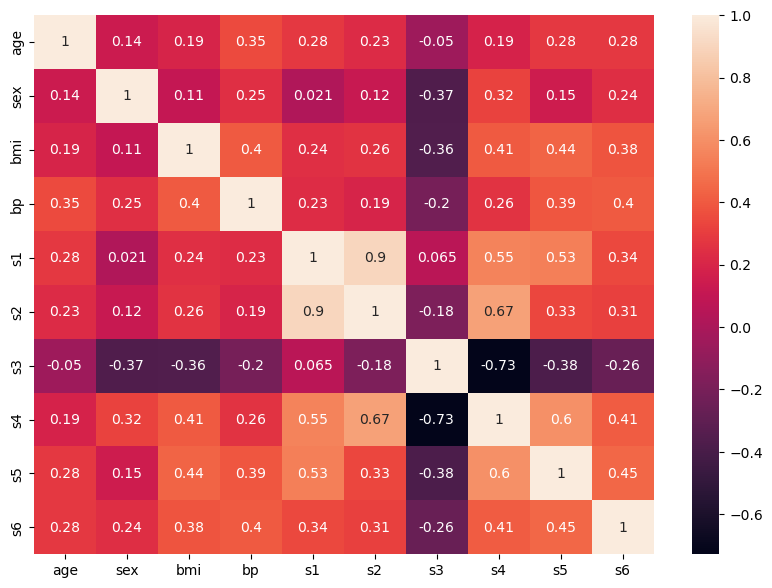

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train.corr(),annot=True)

# fitting the training data into decision tree regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

# Hyperparameter Tuning

### [Scikit learn Decision Tree regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [22]:
parameters = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,7,9,14,20,27],
    'max_features':['auto','sqrt','log2']
}
    

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid = GridSearchCV(reg,param_grid=parameters,cv=10,scoring='neg_mean_squared_error')

In [25]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 9, 14, 20, 27],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [26]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [27]:
y_pred = grid.predict(X_test)

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3631933247748733
47.97022592812584
3311.2853743346145


## Selecting the best model after doing hyperparameter tuning using gridsearchcv

In [31]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_features='sqrt',splitter='best')

In [32]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='sqrt')

## Plotting the finally selected model using sklearn.tree

In [33]:
from sklearn import tree

[Text(0.5, 0.875, 'x[2] <= 0.009\nsquared_error = 6113.681\nsamples = 353\nvalue = 151.901'),
 Text(0.25, 0.625, 'x[3] <= 0.024\nsquared_error = 3917.981\nsamples = 218\nvalue = 119.555'),
 Text(0.125, 0.375, 'x[2] <= -0.03\nsquared_error = 3039.777\nsamples = 170\nvalue = 110.106'),
 Text(0.0625, 0.125, 'squared_error = 2143.499\nsamples = 88\nvalue = 95.716'),
 Text(0.1875, 0.125, 'squared_error = 3540.931\nsamples = 82\nvalue = 125.549'),
 Text(0.375, 0.375, 'x[9] <= 0.051\nsquared_error = 5592.104\nsamples = 48\nvalue = 153.021'),
 Text(0.3125, 0.125, 'squared_error = 4267.494\nsamples = 38\nvalue = 136.079'),
 Text(0.4375, 0.125, 'squared_error = 5390.24\nsamples = 10\nvalue = 217.4'),
 Text(0.75, 0.625, 'x[2] <= 0.069\nsquared_error = 5241.597\nsamples = 135\nvalue = 204.133'),
 Text(0.625, 0.375, 'x[4] <= 0.005\nsquared_error = 4579.09\nsamples = 101\nvalue = 186.139'),
 Text(0.5625, 0.125, 'squared_error = 4641.067\nsamples = 45\nvalue = 161.333'),
 Text(0.6875, 0.125, 'squared

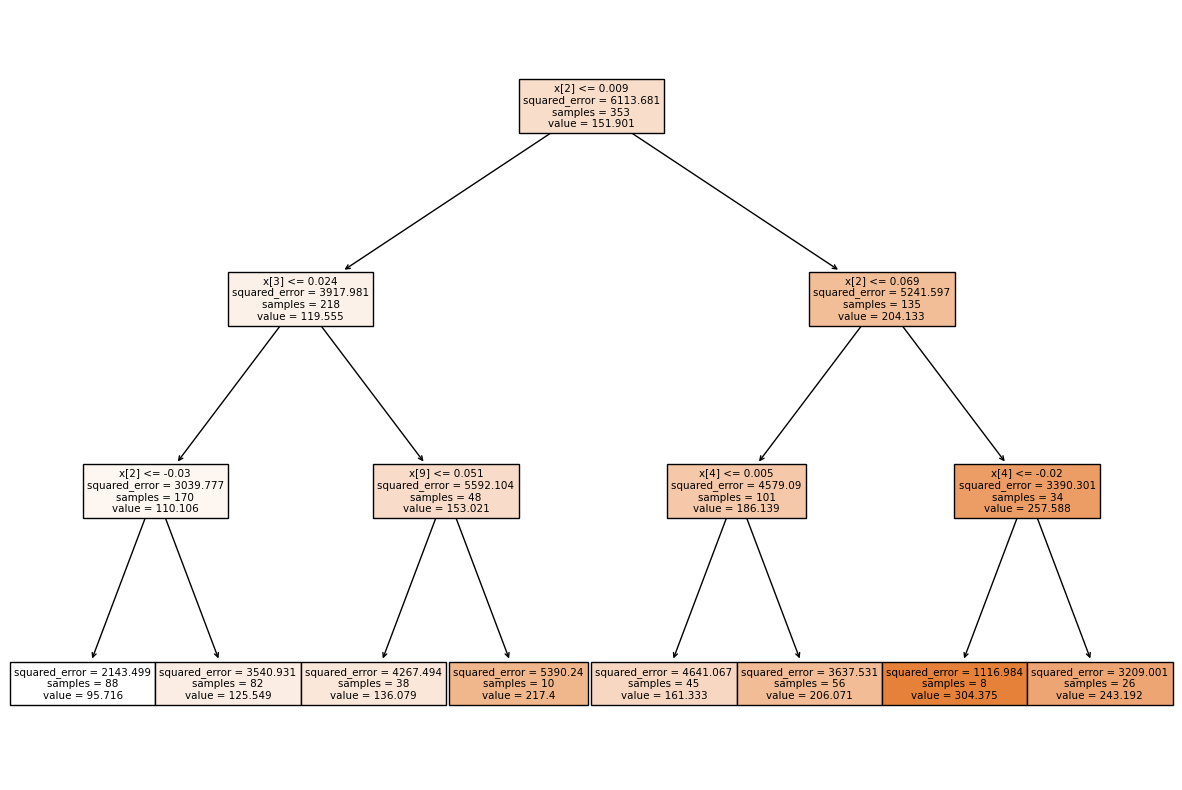

In [34]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)